## 06. DL 입문 - Artificial Neural Network

### 06-01 머신 러닝 기본 개념 정리
1. 머신 러닝 모델의 평가
    - 하이퍼파라미터 : 사람이 정해주는 값
    - 매개변수 : 모델이 학습하면서 얻어지는 값

In [3]:
## 06-03 XOR 문제 구현하기 - 단층 퍼셉트론과 다층 퍼셉트론
### 1. 파이토치로 단층 퍼셉트론 구현

import torch
import torch.nn as nn

device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")
torch.manual_seed(777)

Using device: mps


In [4]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [5]:
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

In [6]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [7]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:  # 100번째 에포크마다 비용 출력
        print(step, cost.item())

0 0.7273974418640137
100 0.6931475400924683
200 0.6931471228599548
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [8]:
# 학습된 단층 퍼셉트론의 예측값 확인하기
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print("모델의 출력값(Hypothesis): ", hypothesis.detach().cpu().numpy())
    print("모델의 예측값(Predicted): ", predicted.detach().cpu().numpy())
    print("실제값(Y): ", Y.detach().cpu().numpy())
    print("정확도(Accuracy): ", accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


In [9]:
# 파이토치로 다층 퍼셉트론 구현
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [10]:
model = nn.Sequential(
    nn.Linear(2, 10, bias=True),  # input_layer = 2, hidden_layer1 = 10
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),  # hidden_layer1 = 10, hidden_layer2 = 10
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),  # hidden_layer2 = 10, hidden_layer3 = 10
    nn.Sigmoid(),
    nn.Linear(10, 1, bias=True),  # hidden_layer3 = 10, output_layer = 1
    nn.Sigmoid(),
).to(device)

In [11]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(
    model.parameters(), lr=1
)  # modified learning rate from 0.1 to 1

In [12]:
for epoch in range(10001):
    optimizer.zero_grad()
    # forward
    hypothesis = model(X)

    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{10000} Cost: {cost.item()}")

Epoch 0/10000 Cost: 0.6940630078315735
Epoch 100/10000 Cost: 0.693112850189209
Epoch 200/10000 Cost: 0.6931090354919434
Epoch 300/10000 Cost: 0.6931047439575195
Epoch 400/10000 Cost: 0.6930999159812927
Epoch 500/10000 Cost: 0.6930946707725525
Epoch 600/10000 Cost: 0.6930885910987854
Epoch 700/10000 Cost: 0.6930817365646362
Epoch 800/10000 Cost: 0.6930739879608154
Epoch 900/10000 Cost: 0.6930649280548096
Epoch 1000/10000 Cost: 0.6930544376373291
Epoch 1100/10000 Cost: 0.693041980266571
Epoch 1200/10000 Cost: 0.693027138710022
Epoch 1300/10000 Cost: 0.6930093765258789
Epoch 1400/10000 Cost: 0.6929874420166016
Epoch 1500/10000 Cost: 0.6929603219032288
Epoch 1600/10000 Cost: 0.692925751209259
Epoch 1700/10000 Cost: 0.6928810477256775
Epoch 1800/10000 Cost: 0.6928213834762573
Epoch 1900/10000 Cost: 0.6927394270896912
Epoch 2000/10000 Cost: 0.692622184753418
Epoch 2100/10000 Cost: 0.6924463510513306
Epoch 2200/10000 Cost: 0.6921650171279907
Epoch 2300/10000 Cost: 0.6916765570640564
Epoch 240

In [13]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print("모델의 출력값(Hypothesis): ", hypothesis.detach().cpu().numpy())
    print("모델의 예측값(Predicted): ", predicted.detach().cpu().numpy())
    print("실제값(Y): ", Y.detach().cpu().numpy())
    print("정확도(Accuracy): ", accuracy.item())

모델의 출력값(Hypothesis):  [[9.5449956e-05]
 [9.9987721e-01]
 [9.9988151e-01]
 [1.1783535e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


In [17]:
#06-05 다층 퍼셉트론으로 손글씨 분류하기
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.images[0])
print(digits.target[0])
print(f'전체 샘플의 수 : {len(digits.images)}')

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0
전체 샘플의 수 : 1797


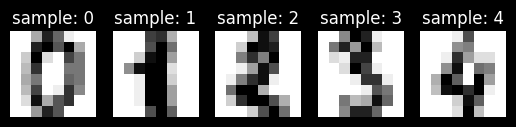

In [21]:
# 전체 샘플중 상위 5개의 샘플만 시각화
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):  # 상위 5개 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis("off")
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title("sample: %i" % label)

In [20]:
for i in range(5):
    print(i, "번 인덱스 샘플의 레이블 : ", digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [23]:
print(digits.data[0])  # 8x8 행렬을 64차원 벡터로 저장한 상태
X = digits.data  # 이미지
Y = digits.target

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [24]:
# 다층 퍼셉트론 분류기 만들기
import torch
import torch.nn as nn
from torch import optim

In [25]:
# 모델 정의 : 순차적인 레이어 구조
model = nn.Sequential(
    nn.Linear(64, 32),  # 입력층 : 64, 첫 번째 은닉층: 32
    nn.ReLU(),  # 활성화 함수 : ReLU
    nn.Linear(32, 16),  # 두 번째 은닉층 : 16
    nn.ReLU(),  # 활성화 함수 : ReLU
    nn.Linear(16, 10),
)

In [26]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [27]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
losses = []

In [28]:
for epoch in range(100):
    optimizer.zero_grad()  # 기울기 초기화
    y_pred = model(X)  # forward로 예측값 계산
    loss = loss_fn(y_pred, Y)  # 손실 함수로 비용 계산
    loss.backward()  # 역전파 계산
    optimizer.step()  # 옵티마이저를 통해 파라미터 업데이트

    # 10번째 에포크마다 현재 에포크와 손실 값 출력
    if epoch % 10 == 0:
        print(f"Epoch {epoch:4d}/100 Cost: {loss.item():.6f}")

    losses.append(loss.item())  # 손실 값을 리스트에 추가하여 추적

Epoch    0/100 Cost: 2.661195
Epoch   10/100 Cost: 2.184336
Epoch   20/100 Cost: 1.999104
Epoch   30/100 Cost: 1.795641
Epoch   40/100 Cost: 1.572132
Epoch   50/100 Cost: 1.335512
Epoch   60/100 Cost: 1.085608
Epoch   70/100 Cost: 0.832515
Epoch   80/100 Cost: 0.610715
Epoch   90/100 Cost: 0.455051


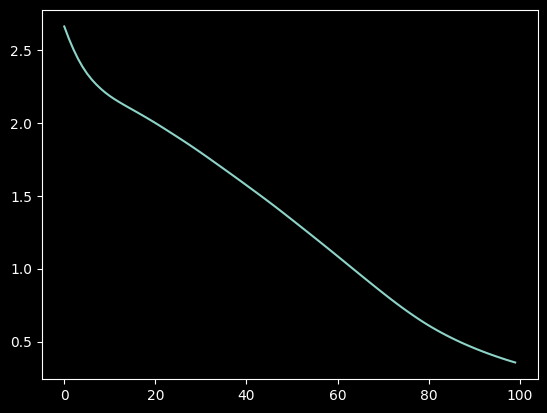

In [29]:
plt.plot(losses)

In [31]:
# 다층 퍼셉트론으로 MNIST 분류하기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml

In [32]:
mnist = fetch_openml("mnist_784", version=1, cache=True, as_frame=False)
print(mnist.data[0])
print(mnist.target[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [33]:
mnist.target = mnist.target.astype(np.int8)

In [34]:
X = mnist.data / 255
y = mnist.target

In [35]:
print(X[0])
print(y[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

이 이미지 데이터의 레이블은 5이다.


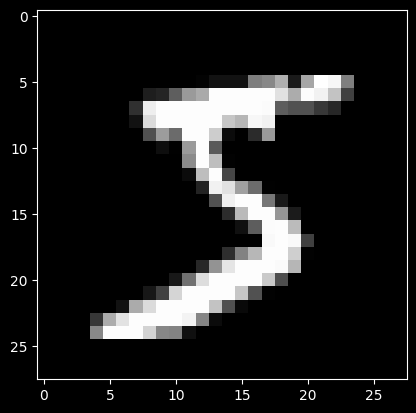

In [36]:
plt.imshow(X[0].reshape(28, 28), cmap="gray")
print(f"이 이미지 데이터의 레이블은 {y[0]:.0f}이다.")

In [37]:
# 훈련데이터, 테스트 데이터 분리
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1 / 7, random_state=0
)

In [39]:
# 텐서로 변환
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# TensorDataset 객체 생성
ds_train = TensorDataset(X_train, y_train)  # X,y를 하나의 데이터셋으로 묶음
ds_test = TensorDataset(X_test, y_test)

# DataLoader 객체 생성
loader_train = DataLoader(
    ds_train, batch_size=64, shuffle=True
)  # 묶인 데이터셋을 모델에 효율적으로 공급
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [41]:
model = nn.Sequential()
model.add_module("fc1", nn.Linear(28 * 28 * 1, 100))
model.add_module("relu1", nn.ReLU())
model.add_module("fc2", nn.Linear(100, 100))
model.add_module("relu2", nn.ReLU())
model.add_module("fc3", nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [42]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [43]:
epochs = 3

for epoch in range(epochs):
    for data, targets in loader_train:
        optimizer.zero_grad()
        y_pred = model(data)
        loss = loss_fn(y_pred, targets)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1:4d}/{3} Cost: {loss.item():.6f}")

Epoch    1/3 Cost: 0.237158
Epoch    2/3 Cost: 0.152399
Epoch    3/3 Cost: 0.011599


In [44]:
model.eval()  # 신경망을 추론 모드로 전환
correct = 0

# 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
with torch.no_grad():
    for data, targets in loader_test:
        outputs = model(data)
        _, predicted = torch.max(
            outputs.data, 1
        )  # 확률이 가장 높은 레이블 무엇인지 계산
        correct += predicted.eq(
            targets.data.view_as(predicted)
        ).sum()  # 정답과 일치하면 정답 카운트 증가

data_num = len(loader_test.dataset)  # 데이터 총 건수
print(
    f"\n테스트 데이터에서 예측 정확도: {correct}/{data_num} ({100*correct/data_num:.0f}%\n)"
)


테스트 데이터에서 예측 정확도: 9565/10000 (96%
)


예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다.


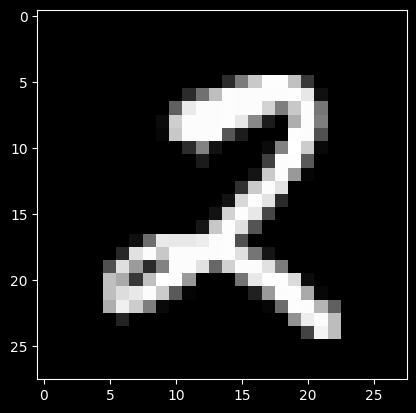

In [ ]:
index = 2018

model.eval()
data = X_test[index]
output = model(data)
_, predicted = torch.max(output.data, 0)
print(f"예측 결과 : {predicted}")

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap="gray")
print(f"이 이미지 데이터의 정답 레이블은 {y_test[index]:.0f}입니다.")